In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
## generate two long0spike time series
# 스파이크 : 시계열 데이터에서 갑작스러운 값의 급변
# 플래토 : 시계열 데이터에서 일정 기간 동안 값이 변동 없이 유지되는 상태
N = 10000 #시계열 데이터의 길이
spikeDur = 10 #a.u but must be an even number / 스파이크의 지속시간
spikeNumA = .01 # in proportion of total number of points / 스파이크가 발생할 비율 
spikeNumB = .05 # in proportion of total number of points

# initialize to zeros
spike_tsA = np.zeros(N)
spike_tsB = np.zeros(N)

### populate time series 1
#스파이크 지점을 랜덤하게 선택
spiketimesA = np.random.randint(0,N,int(N*spikeNumA))


# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesA)):

    # find boundaries
    # 스파이크의 시작과 중심을 결정, max,min은 각 N의 경계 0과 10000을 넘어서 않기 위함
    bnd_pre = int(max(0,spiketimesA[spikei]-spikeDur/2)) # 스파이크의 시작점  spiketimesA[spikei]-spikeDur/2 가 0보다 작아질 시 0으로 맞춤
    bnd_pst = int(min(N,spiketimesA[spikei]+spikeDur/2)) # 스파이크의 종료점 int(min(N,spiketimesA[spikei]+spikeDur/2) 가 10000보다 클 시 10000으로 맞춤

    # fill in with ones
    spike_tsA[bnd_pre:bnd_pst] = 1

# ### repeat for time series 2
spiketimesB = np.random.randint(0,N,int(N*spikeNumB))
#spiketimesB[:len(spiketimesA)] = spiketimesA # 강한 조건확률을 유도 / spiketimesA의 모든 스파이크포인트를 붙여넣음

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesB)):

    # find boundaries
    bnd_pre = int(max(0,spiketimesB[spikei]-spikeDur/2))
    bnd_pst = int(min(N,spiketimesB[spikei]+spikeDur/2))

    # fill in with ones
    spike_tsB[bnd_pre:bnd_pst] = 1

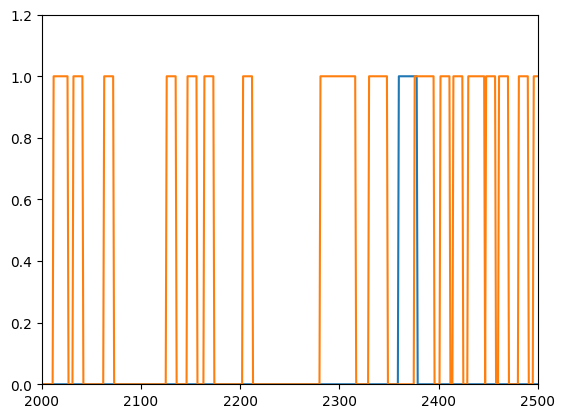

In [27]:
## Let's see what they look like

plt.plot(range(N),spike_tsA,range(N),spike_tsB)
plt.ylim([0,1.2])
plt.xlim([2000,2500])
plt.show()

In [28]:
## compute their probabilites and intersection

# probabilites
probA = sum(spike_tsA==1)/N
probB = np.mean(spike_tsB)

# joint probability
probAB = np.mean(spike_tsA+spike_tsB==2)

print(probA,probB,probAB)

0.0964 0.4017 0.039


In [30]:
## compute the conditional probabilites

# p(A|B)
pAgivenB = probAB/probB

# p(B|A)
pBgivenA = probAB/probA

# print a little report
# A,A|B 와, B,B|A의 확률이 서로 비슷하다면, A,B는 서로 무관함을 의미한다.
print('P(A)      = %g'%probA)
print('P(A|B)    = %g'%pAgivenB)
print('P(B)      = %g'%probB)
print('P(B|A)    = %g'%pBgivenA)

P(A)      = 0.0964
P(A|B)    = 0.0970874
P(B)      = 0.4017
P(B|A)    = 0.404564
